In [1]:
import os
import os.path as op

import activity_viewer
import activity_viewer.models.point
import activity_viewer.viewers

Load up example penetration groups. These live as JSON files in the `docs/source` directory relative to the repo root. One file per penetration group. The format is:

```json
{
    "id": "a unique id string",
    "points": [
        {
            "x": 100,
            "y": 100,
            "z": 100,
            "alpha": 0.8,  // alpha can be constant or vary over time (this is constant, but it would be similar to color below)
            "color": {
                "t": [0, 1, 2],  // time steps
                "vals": ["#ff0000", "#00ff00", "#0000ff"]
            },
            "radius": {
                "t": [0, 2, 3],
                "vals": [200.0, 300.0, 250.0]
            }
        },
        ...  // repeat with as many points as are in your penetration group
    ]
}
```

In [2]:
from activity_viewer.models.point import from_json_file
examples_dir = op.abspath(op.join(os.getcwd(), "..", "docs", "source"))  # directory containing example JSON files

pen_group = from_json_file(op.join(examples_dir, "unitAmp2.json"))  # static penetration group
pen_group2 = from_json_file(op.join(examples_dir, "unitCS2.json"))  # contains animations

In [3]:
%matplotlib notebook

The API endpoint abstracts away queries to the Allen database, so it is reused in both `SliceViewer` and `CompartmentViewer`.

In [4]:
ae = activity_viewer.models.APIEndpoint()

The SliceViewer will have to download a largeish NRRD file, but it will be cached.

<IPython.core.display.Javascript object>


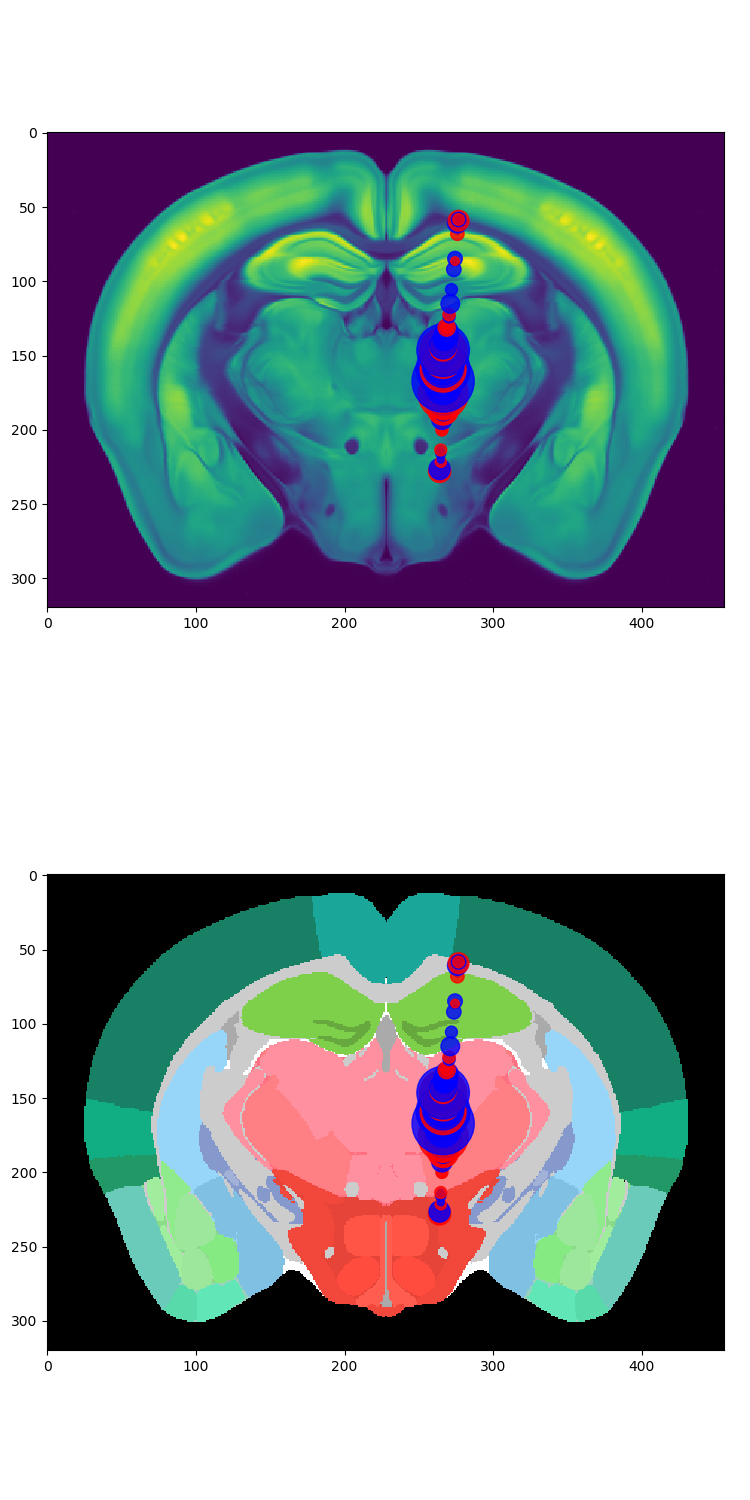

In [5]:
# resolution in um/pix, one of 10, 25, 50, or 100
sv = activity_viewer.viewers.SliceViewer(ae, resolution=25)

Add penetration groups here. These were created a few cells ago, since they are also reused across views. Adding a penetration group finds the "pseudocoronal" slice it can be said to live in and displays it, along with the points.

In [6]:
sv.add_penetration_group(pen_group)

MAE: 3.179; MSE: 668.227


In [7]:
sv.add_penetration_group(pen_group2)

MAE: 3.179; MSE: 668.227


This is the compartment view. The compartment list is populated from the Allen. Ctrl-click on the list to show more than one compartment at once.

In [8]:
cv = activity_viewer.viewers.CompartmentViewer(ae)

Add penetration groups to the `CompartmentViewer` here. `pen_group2` animates just fine in this one.

In [9]:
cv.add_penetration_group(pen_group)

In [10]:
cv.add_penetration_group(pen_group2)